In [104]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import cv2
import traceback
import sys
from scipy import stats
import random
from basic_image_eda import BasicImageEDA

# Exploratory Data Analysis - PlantVillage Dataset

In [16]:
data_dir = 'PlantVillage'
BasicImageEDA.explore(data_dir)


found 20638 images.
Using 12 threads. (max:12)



100%|██████████| 20638/20638 [00:33<00:00, 614.91it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  20638

dtype                                    |  uint8
channels                                 |  [3, 4]
extensions                               |  ['png', 'jpg', 'JPG', 'jpeg']

min height                               |  256
max height                               |  256
mean height                              |  256.0
median height                            |  256

min width                                |  256
max width                                |  256
mean width                               |  256.0
median width                             |  256

mean height/width ratio                  |  1.0
median height/width ratio                |  1.0
recommended input size(by mean)          |  [256 256] (h x w, multiples of 8)
recommended input size(by mean)          |  [256 256] (h x w, multiples of 16)
recommended input size(by mean)         

{'dtype': 'uint8',
 'channels': [3, 4],
 'extensions': ['png', 'jpg', 'JPG', 'jpeg'],
 'min_h': 256,
 'max_h': 256,
 'mean_h': 256.0,
 'median_h': 256,
 'min_w': 256,
 'max_w': 256,
 'mean_w': 256.0,
 'median_w': 256,
 'mean_hw_ratio': 1.0,
 'median_hw_ratio': 1.0,
 'rec_hw_size_8': array([256, 256]),
 'rec_hw_size_16': array([256, 256]),
 'rec_hw_size_32': array([256, 256]),
 'mean': array([0.41147962, 0.47504377, 0.45860842], dtype=float32),
 'std': array([0.20718741, 0.17041811, 0.19312458], dtype=float32)}

In [17]:
categories = []

for root, dirs, files in os.walk(data_dir):
    for dir_path in dirs:
        categories.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

categories_df = pd.DataFrame(categories, columns=['Category', 'Count'])
categories_df

,Category,Count
0,Pepper__bell___Bacterial_spot,997
1,Pepper__bell___healthy,1478
2,Potato___Early_blight,1000
3,Potato___healthy,152
4,Potato___Late_blight,1000
5,Tomato_Bacterial_spot,2127
6,Tomato_Early_blight,1000
7,Tomato_healthy,1591
8,Tomato_Late_blight,1909
9,Tomato_Leaf_Mold,952


In [18]:
total_images = categories_df['Count'].sum()
total_images

20639

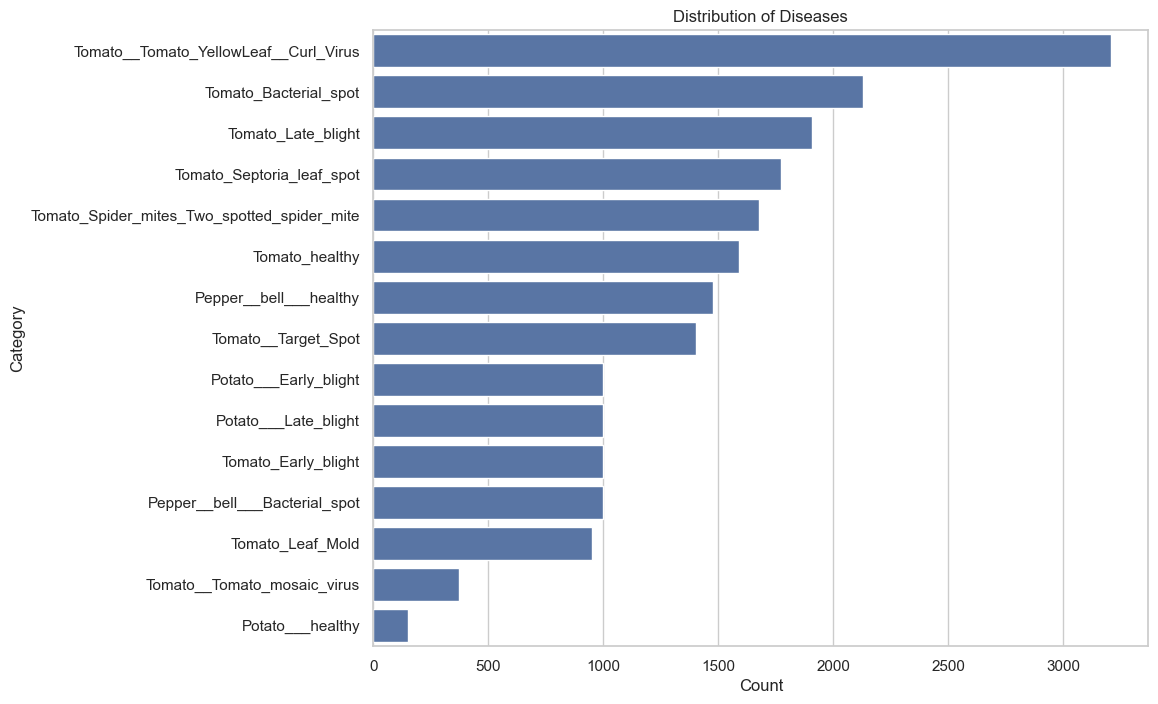

In [19]:
categories_df = categories_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x="Count", y="Category", data=categories_df)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Diseases')
plt.show()

In [20]:
healthy_images = categories_df[categories_df['Category'].str.endswith("healthy")]['Count'].sum()
unhealthy_images = total_images - healthy_images
print(healthy_images, unhealthy_images)

3221 17418


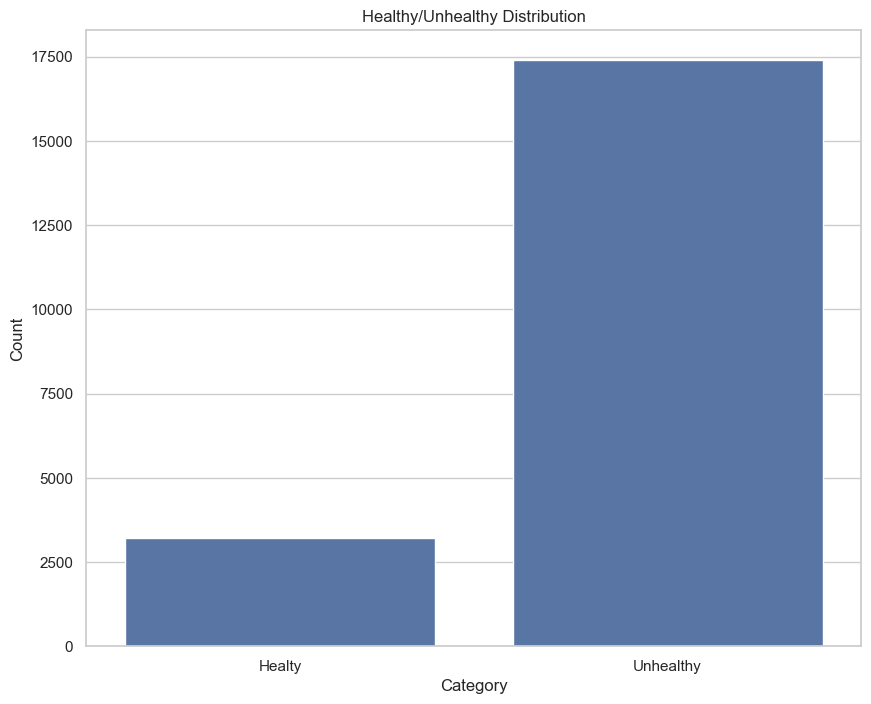

In [21]:
health_df = pd.DataFrame(data=[("Healty", healthy_images), ("Unhealthy", unhealthy_images)], columns=['Category', 'Count'])
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Count", data=health_df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Healthy/Unhealthy Distribution')
plt.show()

# Exploratory Data Analysis -> Tomatoes

In [116]:
data_dir = 'PlantVillage_tomatoes'

In [117]:
categories = []

for root, dirs, files in os.walk(data_dir):
    for dir_path in dirs:
        categories.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

categories_df = pd.DataFrame(categories, columns=['Category', 'Count'])
categories_df

,Category,Count
0,Tomato_Bacterial_spot,2127
1,Tomato_Early_blight,1000
2,Tomato_healthy,1591
3,Tomato_Late_blight,1909
4,Tomato_Leaf_Mold,952
5,Tomato_Septoria_leaf_spot,1771
6,Tomato_Spider_mites_Two_spotted_spider_mite,1676
7,Tomato__Target_Spot,1404
8,Tomato__Tomato_mosaic_virus,373
9,Tomato__Tomato_YellowLeaf__Curl_Virus,3209


In [118]:
total_images = categories_df['Count'].sum()
total_images

16012

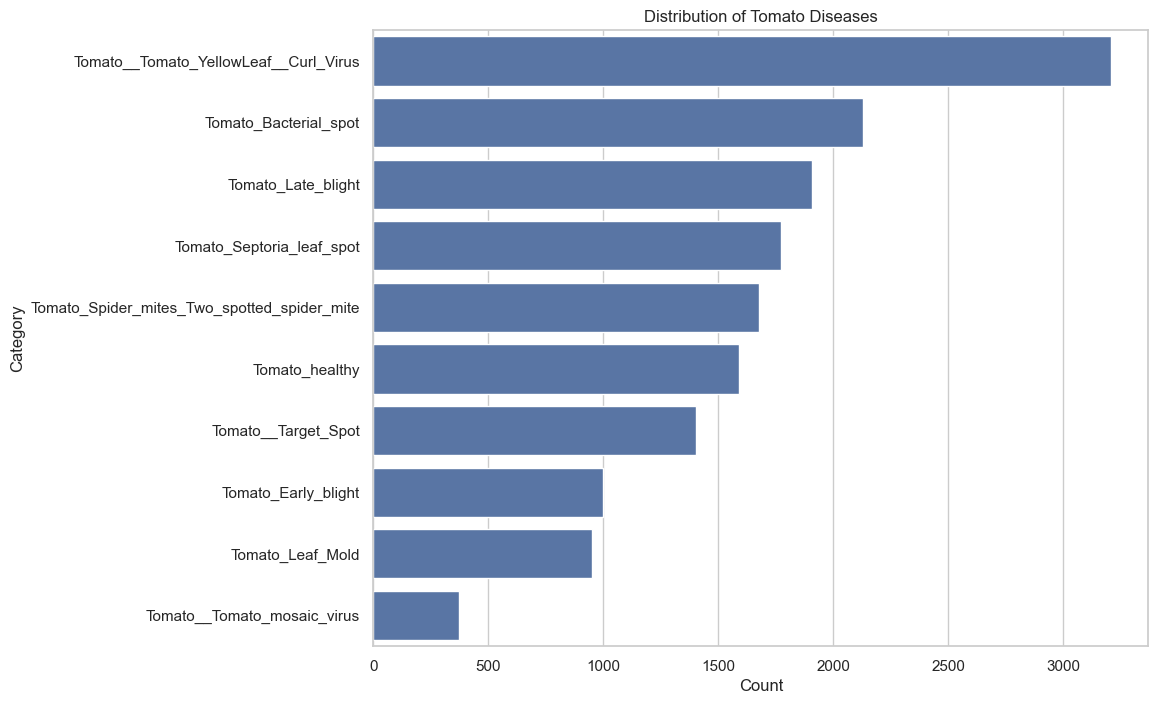

In [119]:
categories_df = categories_df.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x="Count", y="Category", data=categories_df)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Tomato Diseases')
plt.show()

In [120]:
healthy_images = categories_df[categories_df['Category'].str.endswith("healthy")]['Count'].sum()
unhealthy_images = total_images - healthy_images
print(healthy_images, unhealthy_images)

1591 14421


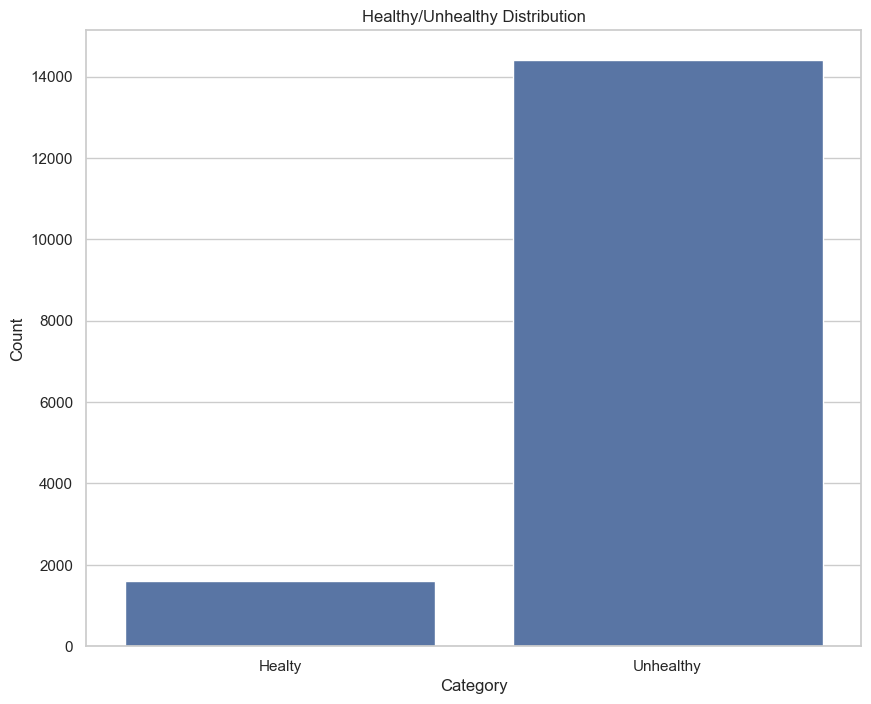

In [121]:
health_df = pd.DataFrame(data=[("Healty", healthy_images), ("Unhealthy", unhealthy_images)], columns=['Category', 'Count'])
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Count", data=health_df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Healthy/Unhealthy Distribution')
plt.show()

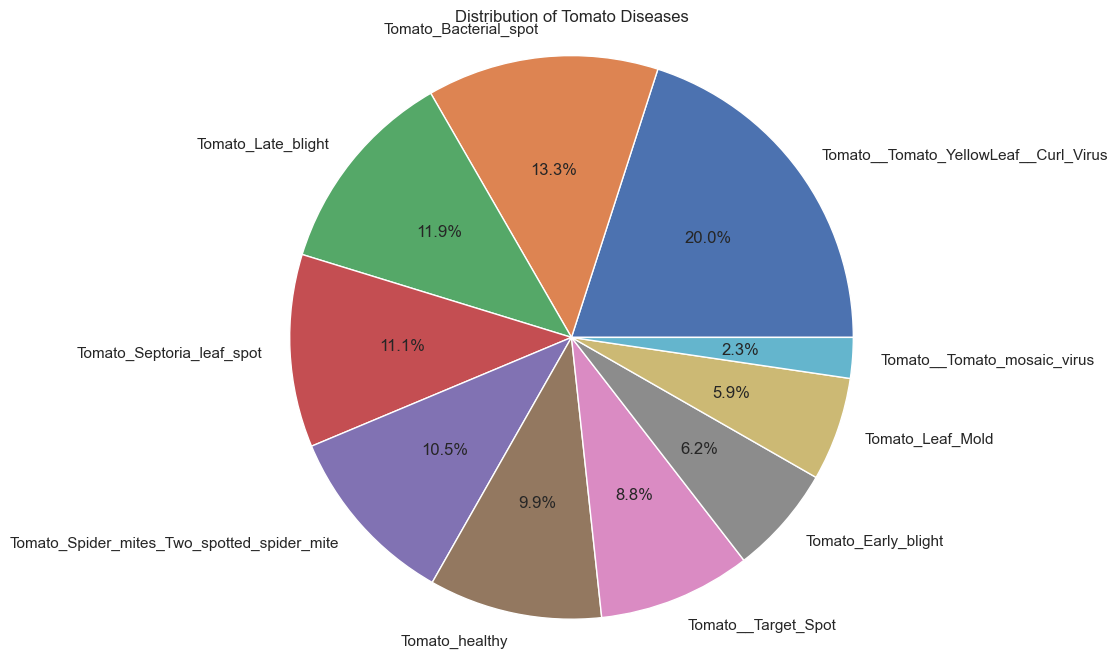

In [122]:
plt.figure(figsize=(8, 8))
plt.pie(categories_df['Count'], labels=categories_df['Category'], autopct='%1.1f%%')
plt.title('Distribution of Tomato Diseases')
plt.axis('equal')
plt.show()

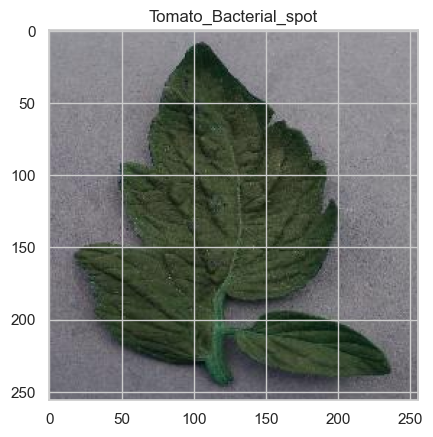

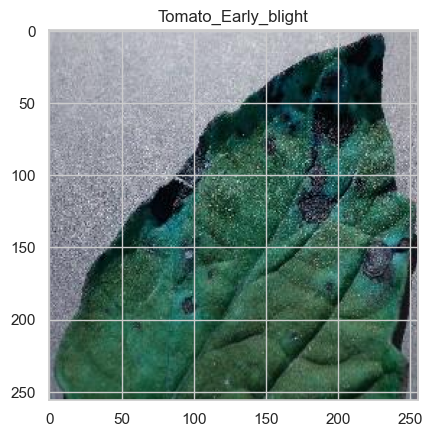

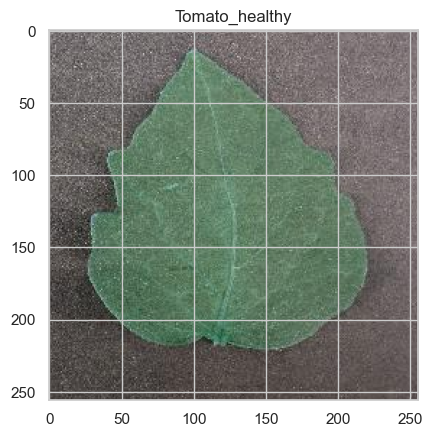

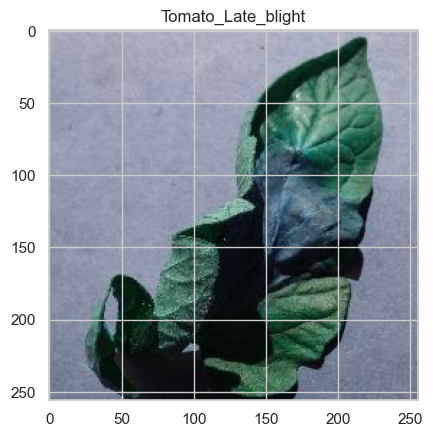

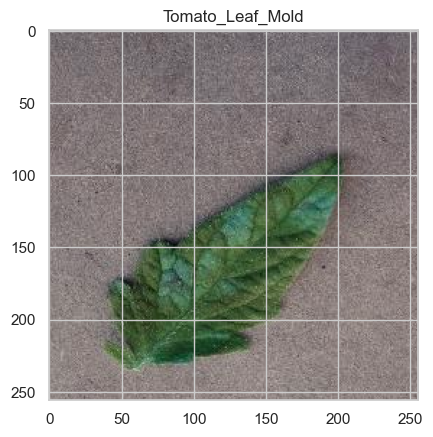

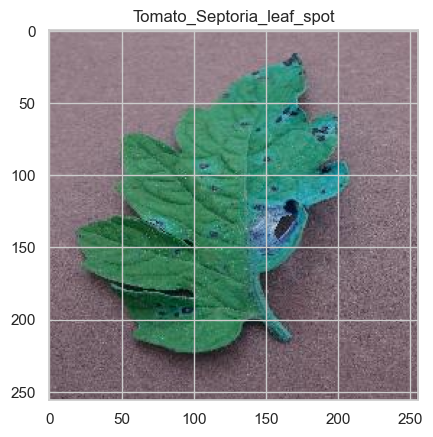

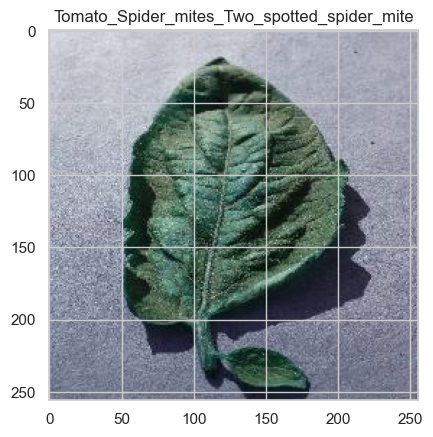

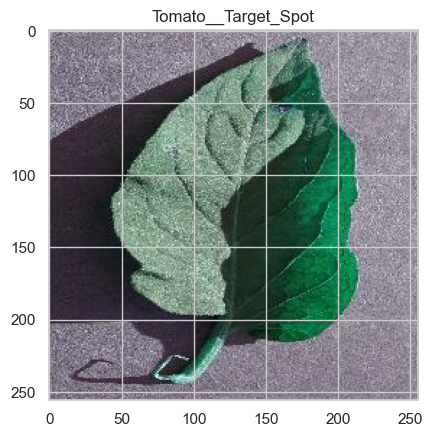

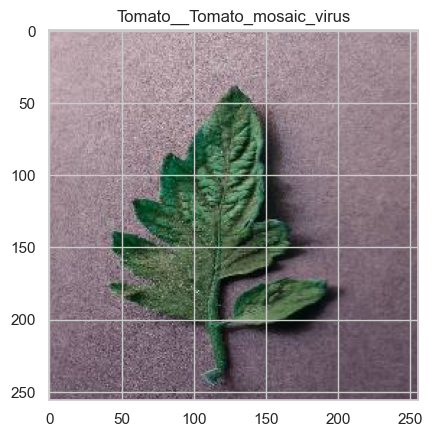

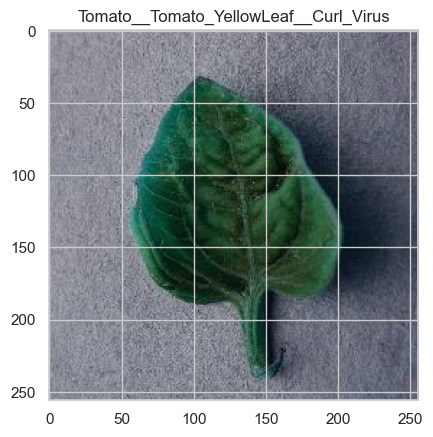

In [29]:
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
            if image is not None:
                plt.imshow(image)
                plt.title(f'{category}')
                plt.show()
                break 

# Data Preprocessig

In [89]:
data_dir = 'PlantVillage_tomatoes'
output_dir = 'PlantVillage_tomatoes_augumented'

In [ ]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for root, dirs, files in os.walk(data_dir):
    for file in files:
        relative_dir = os.path.relpath(root, data_dir)
        output_subdir = os.path.join(output_dir, relative_dir)

        if not os.path.exists(output_subdir):
            os.makedirs(output_subdir)

        image_path = os.path.join(root, file)
        image = cv2.imread(image_path)

        resized_image = cv2.resize(image, (128, 128))

        output_path = os.path.join(output_subdir, file)
        cv2.imwrite(output_path, resized_image)

In [95]:
def random_augumentation(image):
    flip_direction = np.random.randint(0, 3)
    if flip_direction == 1:
        image = cv2.flip(image, 1)
    elif flip_direction == 2:
        image = cv2.flip(image, 0)

    angle = np.random.uniform(-30, 30)
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale=1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows), borderMode=cv2.BORDER_REPLICATE)

    return rotated_image

In [5]:
import numpy as np
import cv2

def random_augumentation2(image):
    flip_direction = np.random.randint(0, 3)
    if flip_direction == 1:
        image = cv2.flip(image, 1)
    elif flip_direction == 2:
        image = cv2.flip(image, 0)

    angle = np.random.uniform(-30, 30)
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale=1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows), borderMode=cv2.BORDER_REPLICATE)

    cv2.imshow("Rotated Image", rotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

image = cv2.imread("PlantVillage_tomatoes_augumented\\Tomato_Septoria_leaf_spot\\0a68a294-30d1-4422-ab7e-a1909ec277f7___JR_Sept.L.S 8443.JPG")

if image is not None:
    random_augumentation2(image)
else:
    print("Error: Failed to load the image.")


In [107]:
image_directory = 'PlantVillage_tomatoes_augumented'
IMAGE_COUNT = 3209

for dir in os.listdir(image_directory):
    print('Processing directory: ', dir)
    folder_path = os.path.join(image_directory, dir)
    current_count = len(os.listdir(folder_path))
    images = [file for file in os.listdir(folder_path)]
    while(current_count < IMAGE_COUNT):
        image_name = random.choice(images)
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        augumented_image = random_augumentation(image)
        augumented_path = os.path.join(folder_path, f'aug{current_count}.jpg')
        cv2.imwrite(augumented_path, augumented_image)
        current_count += 1

Processing directory:  Tomato_Bacterial_spot
Processing directory:  Tomato_Early_blight
Processing directory:  Tomato_healthy
Processing directory:  Tomato_Late_blight
Processing directory:  Tomato_Leaf_Mold
Processing directory:  Tomato_Septoria_leaf_spot
Processing directory:  Tomato_Spider_mites_Two_spotted_spider_mite
Processing directory:  Tomato__Target_Spot
Processing directory:  Tomato__Tomato_mosaic_virus
Processing directory:  Tomato__Tomato_YellowLeaf__Curl_Virus


In [115]:
data_dir = 'PlantVillage_tomatoes_augumented'
categories = []

for root, dirs, files in os.walk(data_dir):
    for dir_path in dirs:
        categories.append((dir_path, len(os.listdir(root+os.sep+dir_path))))

categories_df = pd.DataFrame(categories, columns=['Category', 'Count'])
categories_df

,Category,Count
0,Tomato_Bacterial_spot,3209
1,Tomato_Early_blight,3209
2,Tomato_healthy,3209
3,Tomato_Late_blight,3209
4,Tomato_Leaf_Mold,3209
5,Tomato_Septoria_leaf_spot,3209
6,Tomato_Spider_mites_Two_spotted_spider_mite,3209
7,Tomato__Target_Spot,3209
8,Tomato__Tomato_mosaic_virus,3209
9,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
